## Text Vectorization

##### Author: Saurabh Kumar

In [1]:
from IPython.core.display import display, HTML
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

- **tokenizing** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- **counting** the occurrences of tokens in each document.

- **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.

Sources: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

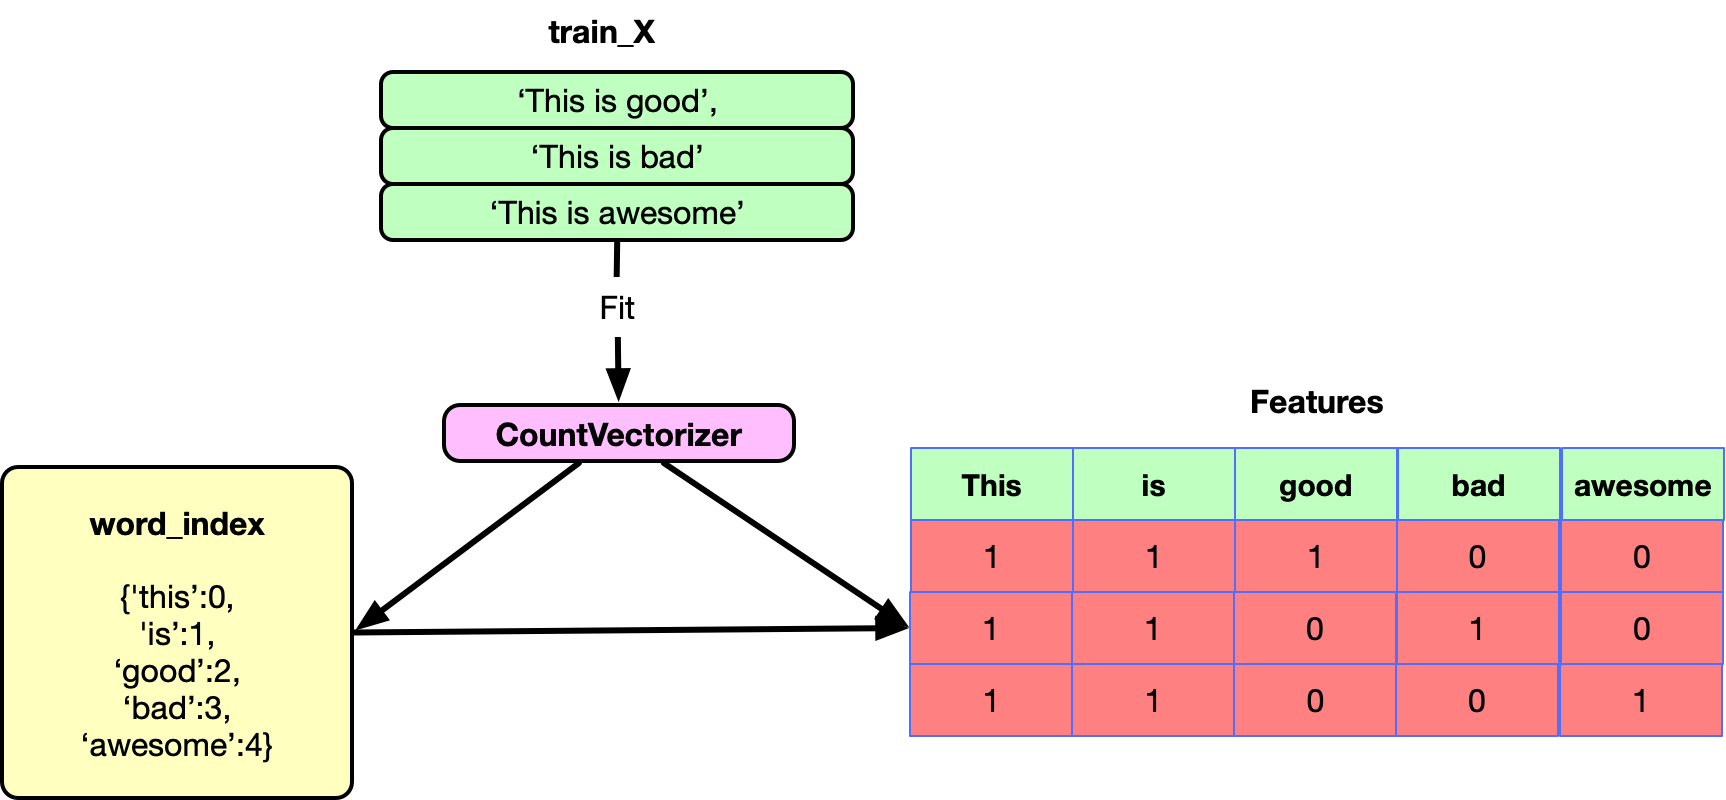

In [2]:
# Document and Word Vectors
Image('https://mlwhiz.com/images/countvectorizer.png',width=800, height=400)

In [2]:
# create a list of documents
# text = ['This is the first document'
#         , 'This is the second second document'
#         , 'And the third one'
#         , 'Is it the first document again']

text=['This is good',
     'This is bad',
     'This is awesome']

### Step 1 - import from sklearn

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

### Step 2 - instantiate

In [4]:
# create an instance of countvectorizer
vect = CountVectorizer()  # shift tab 

In [5]:
# when we print vect, we see its hyperparameters
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


### Step 3 - fit 

In [6]:
# The vectorizer learns the vocabulary when we fit it with our documents. 
# This means it learns the distinct tokens (terms) in the text of the documents. 
# We can observe these with the method get_feature_names

vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [7]:
print('ORIGINAL_SENTENCES: \n {} \n'.format(text))
print('FEATURE_NAMES: \n {}'.format(vect.get_feature_names()))

ORIGINAL_SENTENCES: 
 ['This is good', 'This is bad', 'This is awesome'] 

FEATURE_NAMES: 
 ['awesome', 'bad', 'good', 'is', 'this']


### Step 4 - transform 

In [8]:
# Transform creates a sparse matrix, identifying the indices where terms are stores in each document
# This sparse matrix has 4 rows and 11 columns

pd.DataFrame(vect.transform(text).toarray(),columns= ['awesome', 'bad', 'good', 'is', 'this'])[ ['this','is','good','bad','awesome']]

,this,is,good,bad,awesome
0,1,1,1,0,0
1,1,1,0,1,0
2,1,1,0,0,1


### Sparsity

As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In [10]:
print(vect.transform(text))

  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (2, 0)	1
  (2, 3)	1
  (2, 4)	1


In [9]:
sparse_matrix_url = 'https://op2.github.io/PyOP2/_images/csr.svg'
iframe = '<iframe src={} width=1000 height=200></iframe>'.format(sparse_matrix_url)
HTML(iframe)

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [10]:
# This is easier to understand when we covert the sparse matrix into a dense matrix or pandas DataFrame
vect.transform(text).toarray()

array([[0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1]], dtype=int64)

In [11]:
import pandas as pd

# store the dense matrix
data = vect.transform(text).toarray()

# store the learned vocabulary
columns = vect.get_feature_names()

# combine the data and columns into a dataframe
pd.DataFrame(data, columns=columns)[['this','is','good','bad','awesome']]

,this,is,good,bad,awesome
0,1,1,1,0,0
1,1,1,0,1,0
2,1,1,0,0,1


### Bag of Words

We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while `completely ignoring the relative position information of the words in the document.`

A corpus of documents can thus be represented by a **matrix with one row per document and one column per token (e.g. word)** occurring in the corpus.

### fit_transform

- we can combine the training and transformation into a single method. This is a common process in the sklearn api, as we often want to learn something from a training data set and apply the results to testing or production data

fit().transform()

In [12]:
vect = CountVectorizer()
vect.fit_transform(text).toarray()

array([[0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1]], dtype=int64)

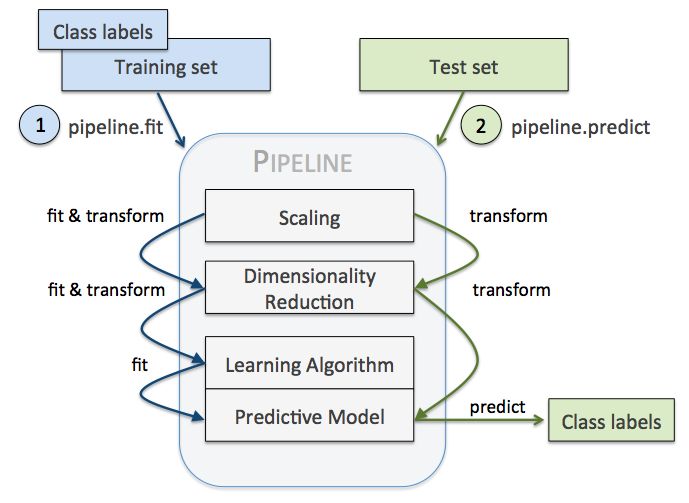

In [17]:
Image('http://karlrosaen.com/ml/learning-log/2016-06-20/pipeline-diagram.png')

## Customize the Transformer

During the process of vectorizing the text, we can apply numerous transformations to modify the text and resulting vectors. 

### lowercase
- boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [13]:
text = ['This is the first document'
        , 'This is the second second document'
        , 'And the third one'
        , 'Is it the first document again']

In [14]:
vect = CountVectorizer()

In [16]:
# by instantiating CountVectorizer with differnt parameters, we can change the vocabulary
# lowercase determines if all words should be lowercase, setting it to False includes uppercase words

vect = CountVectorizer(lowercase=True)
vect.fit(text)
print(vect.get_feature_names())

['again', 'and', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third', 'this']


### stop_words

- string {‘english’}, list, or None (default)
 - If None, no stop words will be used. 
 - If ‘english’, a built-in stop word list for English is used.
 - If list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words 


In [17]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(stop_words='english')
vect.fit(text)
print(vect.get_feature_names())

['document', 'second']


In [18]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(stop_words=['first','second','third'])
vect.fit(text)
print(vect.get_feature_names())

['again', 'and', 'document', 'is', 'it', 'one', 'the', 'this']


### vocabulary

- Mapping or iterable, optional
- Either a Mapping (e.g., a dict) where keys are terms and values are indices in the feature matrix, or an iterable over terms. If not given, a vocabulary is determined from the input documents. 

In [23]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(vocabulary=['first','second','third'])
vect.fit(text)
print(vect.get_feature_names())

['first', 'second', 'third']


In [24]:
vect.transform(text).toarray()

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 1],
       [1, 0, 0]])

### max_features
- int or None, default=None
- If not None, build a vocabulary that only consider the top  max_features ordered by term frequency across the corpus.

In [25]:
vect = CountVectorizer(max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'second', 'the']


### max_df
- float in range [0.0, 1.0] or int, default=1.0
- When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [26]:
vect = CountVectorizer(max_df=.5)
vect.fit(text)
print(vect.get_feature_names())

['again', 'and', 'first', 'it', 'one', 'second', 'third', 'this']


### min_df

- float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [27]:
vect = CountVectorizer(min_df=.5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'the', 'this']


### ngram_range

- tuple (min_n, max_n)

- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [28]:
# max features determines the maximum number of features to display
vect = CountVectorizer(ngram_range=(1,2), max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'the', 'this is']


### binary

- boolean, default=False
- If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

In [29]:
# max features determines the maximum number of features to display
vect = CountVectorizer(binary=True)
vect.fit_transform(['Two Two different words words']).toarray()

array([[1, 1, 1]], dtype=int64)

### analyzer

- String, {‘word’, ‘char’, ‘char_wb’} or callable
- Specifies whether to use n_grams of words or characters
- Character n_grams are useful in certain content, such as genomics with DNA sequences (e.g. GCTATCAFF...)

In [30]:
# max features determines the maximum number of features to display
vect = CountVectorizer(analyzer='char', ngram_range=(2,2))
vect.fit(text)
print(vect.get_feature_names())

[' a', ' d', ' f', ' i', ' o', ' s', ' t', 'ag', 'ai', 'an', 'co', 'cu', 'd ', 'do', 'e ', 'ec', 'en', 'fi', 'ga', 'he', 'hi', 'in', 'ir', 'is', 'it', 'me', 'nd', 'ne', 'nt', 'oc', 'on', 'rd', 'rs', 's ', 'se', 'st', 't ', 'th', 'um']


### Limitations of the Bag of Words representation

A collection of unigrams (what bag of words is) cannot capture phrases and multi-word expressions, effectively disregarding any word order dependence. Additionally, the bag of words model doesn’t account for potential misspellings or word derivations.

N-grams to the rescue! Instead of building a simple collection of unigrams (n=1), one might prefer a collection of bigrams (n=2), where occurrences of pairs of consecutive words are counted.

One might alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.

For example, let’s say we’re dealing with a corpus of two documents: ['words', 'wprds']. The second document contains a misspelling of the word ‘words’. A simple bag of words representation would consider these two as very distinct documents, differing in both of the two possible features. A character 2-gram representation, however, would find the documents matching in 4 out of 8 features, which may help the preferred classifier decide better:

# Attributes

In scikit-learn attributes are often provided to store information of the instance of the transformer or model. 

Many attributes are only available after the model is fit. For instance the learned vocabulary does not exist in Countvectorizer until text data has been provided with the fit method. Until the data is provided these attributes do not exist. The notation for these learned attributes is a trailing underscore after the attribute name (e.g. vocabulary_). 

In [31]:
vect = CountVectorizer(max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'second', 'the']


### vocabulary_

- dict
- A mapping of terms to feature indices.

In [32]:
vect.vocabulary_

{'is': 2, 'the': 4, 'first': 1, 'document': 0, 'second': 3}

### stop\__words_\_ 
- set
- Terms that were ignored because they either:
 - occurred in too many documents (max_df)
 - occurred in too few documents (min_df)
 - were cut off by feature selection (max_features)

In [33]:
vect.stop_words_

{'again', 'and', 'it', 'one', 'third', 'this'}

### Term-Frequency Problems

"The **main problem with the term-frequency approach is that it scales up frequent terms and scales down rare terms which are empirically more informative than the high frequency terms.**
The basic intuition is that a term that occurs frequently in many documents is not a good discriminator; the important question here is: why would you, in a classification problem for instance, emphasize a term which is almost present in the entire corpus of your documents ?

The tf-idf weight comes to solve this problem. **What tf-idf gives is how important is a word to a document**
in a collection, and that’s why tf-idf incorporates local and global parameters, because it takes in consideration not only the isolated term but also the term within the document collection. **What tf-idf then does to solve that problem, is to scale down the frequent terms while scaling up the rare terms; a term that occurs 10 times more than another isn’t 10 times more important than it, that’s why tf-idf uses the logarithmic scale to do that."**

Source: http://blog.christianperone.com/2011/10/machine-learning-text-feature-extraction-tf-idf-part-ii/

### TFIDF

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.
Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency: 

- tf-idf(t,d) = tf(t,d) * idf(t)

In [19]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
text

['This is the first document',
 'This is the second second document',
 'And the third one',
 'Is it the first document again']

In [21]:
tfidf_vect = TfidfVectorizer()
pd.DataFrame(tfidf_vect.fit_transform(text).toarray(), columns=tfidf_vect.get_feature_names())

,again,and,document,first,is,it,one,second,the,third,this
0,0.000000,0.000000,0.418127,0.516470,0.418127,0.000000,0.000000,0.000000,0.341846,0.000000,0.516470
1,0.000000,0.000000,0.267144,0.000000,0.267144,0.000000,0.000000,0.837067,0.218408,0.000000,0.329977
2,0.000000,0.552805,0.000000,0.000000,0.000000,0.000000,0.552805,0.000000,0.288477,0.552805,0.000000
3,0.519263,0.000000,0.331439,0.409393,0.331439,0.519263,0.000000,0.000000,0.270973,0.000000,0.000000


### TFIDF Analysis
As we look at the tfidf score (which have a range of 0-1), high score occur for words that show up frequently in specific sentence but infrequenty overall. Low score occur in words that show up frequenty across all documents.

- **'Second' has a high score** as it shows up twice in document two and not in any other documents
- **'The' has a low score** as it show up in all documents

## TFIDF Calculation

#### term frequency (tf)

How often does each term exist in each document. 

Term frequency is the numerator; thus, the tfidf score for a term increases in documents where it is frequent.

In [37]:
vect = CountVectorizer()
tf = vect.fit_transform(text).toarray()
pd.DataFrame(tf,columns= vect.get_feature_names())

,again,and,document,first,is,it,one,second,the,third,this
0,0,0,1,1,1,0,0,0,1,0,1
1,0,0,1,0,1,0,0,2,1,0,1
2,0,1,0,0,0,0,1,0,1,1,0
3,1,0,1,1,1,1,0,0,1,0,0


#### inverse document frequency (idf)

Calculation: log(\# document in the corpus / # documents where the term appears)

- Numerator: **The # of documents in the corpus has no effect** as it is the same for all terms
- Denominator: **As the # of documents in which the term appears increases, the idf decreases**; thus terms that show up in many different documents (e.g. stop words) recieve low tfidf scores as they are not important terms to define the meaning of the document 
- As a sub-linear function, we take the **log because the relevance does not increase proportionally with the term frequency**. As an example if a term shows up in 1M docs or in 2M docs, the effect is not the same as if it has shown up in 1 doc or 2 docs times respectively. In other words there is a relative threshold.

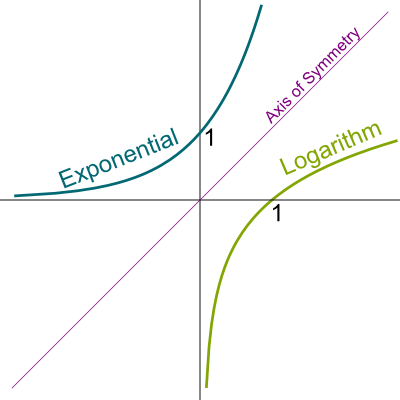

In [38]:
Image('http://www.science4all.org/wp-content/uploads/2013/10/Graph-of-Logarithm-and-Exponential1.png')

In [39]:
tf

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [40]:
len(tf)

4

In [41]:
vect = CountVectorizer(binary=True)
count_vec = vect.fit_transform(text).toarray()
pd.DataFrame(count_vec,columns= vect.get_feature_names())

,again,and,document,first,is,it,one,second,the,third,this
0,0,0,1,1,1,0,0,0,1,0,1
1,0,0,1,0,1,0,0,1,1,0,1
2,0,1,0,0,0,0,1,0,1,1,0
3,1,0,1,1,1,1,0,0,1,0,0


In [42]:
len(count_vec)

4

In [43]:
# idf calculation
print( np.log(len(count_vec) / count_vec.sum(axis=0)) )

[1.38629436 1.38629436 0.28768207 0.69314718 0.28768207 1.38629436
 1.38629436 1.38629436 0.         1.38629436 0.69314718]


In [44]:
list(zip(vect.get_feature_names(),np.log(len(count_vec) / count_vec.sum(axis=0))))

[('again', 1.3862943611198906),
 ('and', 1.3862943611198906),
 ('document', 0.28768207245178085),
 ('first', 0.6931471805599453),
 ('is', 0.28768207245178085),
 ('it', 1.3862943611198906),
 ('one', 1.3862943611198906),
 ('second', 1.3862943611198906),
 ('the', 0.0),
 ('third', 1.3862943611198906),
 ('this', 0.6931471805599453)]

In [45]:
# when we use sum(axis=0) we take the sum of each column
# as opposed to a scalar sum (single # result) of all values
count_vec.sum(axis=0)

array([1, 1, 3, 2, 3, 1, 1, 1, 4, 1, 2], dtype=int64)

#### scikit-learn calculation modifications

scikit-learn further modifies the caluclation for adding one to the numerator, denominator, and log to avoid divide by zero errors

In [46]:
idf = np.log( (len(count_vec)+1) / (count_vec.sum(axis=0)+1) ) + 1
print(idf)

[1.91629073 1.91629073 1.22314355 1.51082562 1.22314355 1.91629073
 1.91629073 1.91629073 1.         1.91629073 1.51082562]


In [47]:
# value as stored from sklearn in tfidf_vect
print(tfidf_vect.idf_)

[1.91629073 1.91629073 1.22314355 1.51082562 1.22314355 1.91629073
 1.91629073 1.91629073 1.         1.91629073 1.51082562]


#### term frequency * inverse document frequency (tf*idf)

In [48]:
tfidf = pd.DataFrame(tf*idf,columns=tfidf_vect.get_feature_names())
tfidf

,again,and,document,first,is,it,one,second,the,third,this
0,0.000000,0.000000,1.223144,1.510826,1.223144,0.000000,0.000000,0.000000,1.0,0.000000,1.510826
1,0.000000,0.000000,1.223144,0.000000,1.223144,0.000000,0.000000,3.832581,1.0,0.000000,1.510826
2,0.000000,1.916291,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000,1.0,1.916291,0.000000
3,1.916291,0.000000,1.223144,1.510826,1.223144,1.916291,0.000000,0.000000,1.0,0.000000,0.000000


#### term vector normalization

The use of the simple tfidf does not account for the length of the document. Additionally it provides opportunities for spammers to repeat the term many times to make it seem more important in a specific document (e.g. to improve google search ranking)

To solve these issues, we normalize each vector. By default TfidfVectorizer uses an 'l2' normalization.

In [22]:
# tf*idf is equivalent to using TfidfVectorizer without a norm
tfidf_vect = TfidfVectorizer(norm=None)
pd.DataFrame(tfidf_vect.fit_transform(text).toarray())

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,1.223144,1.510826,1.223144,0.000000,0.000000,0.000000,1.0,0.000000,1.510826
1,0.000000,0.000000,1.223144,0.000000,1.223144,0.000000,0.000000,3.832581,1.0,0.000000,1.510826
2,0.000000,1.916291,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000,1.0,1.916291,0.000000
3,1.916291,0.000000,1.223144,1.510826,1.223144,1.916291,0.000000,0.000000,1.0,0.000000,0.000000


In [24]:
from sklearn.preprocessing import normalize

tfidf = pd.DataFrame(tfidf_vect.fit_transform(text).toarray())

pd.DataFrame(normalize(tfidf, norm='l2'))

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,0.418127,0.516470,0.418127,0.000000,0.000000,0.000000,0.341846,0.000000,0.516470
1,0.000000,0.000000,0.267144,0.000000,0.267144,0.000000,0.000000,0.837067,0.218408,0.000000,0.329977
2,0.000000,0.552805,0.000000,0.000000,0.000000,0.000000,0.552805,0.000000,0.288477,0.552805,0.000000
3,0.519263,0.000000,0.331439,0.409393,0.331439,0.519263,0.000000,0.000000,0.270973,0.000000,0.000000


In [51]:
# normalize()

In [25]:
# TFIDF Weighting in Sklearn
'http://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting'

# tf*idf is equivalent to using TfidfVectorizer without a norm
tfidf_vect = TfidfVectorizer(norm='l2')
pd.DataFrame(tfidf_vect.fit_transform(text).toarray())

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,0.418127,0.516470,0.418127,0.000000,0.000000,0.000000,0.341846,0.000000,0.516470
1,0.000000,0.000000,0.267144,0.000000,0.267144,0.000000,0.000000,0.837067,0.218408,0.000000,0.329977
2,0.000000,0.552805,0.000000,0.000000,0.000000,0.000000,0.552805,0.000000,0.288477,0.552805,0.000000
3,0.519263,0.000000,0.331439,0.409393,0.331439,0.519263,0.000000,0.000000,0.270973,0.000000,0.000000


In [53]:
import os
os.listdir('../input')

['usinlppracticum']

**tf-idf on imdb dataset**

In [54]:
path='../input/usinlppracticum/imdb_train.csv'
data= pd.read_csv(path)
data.head()

,review,sentiment
0,We had STARZ free weekend and I switched on th...,negative
1,I'll admit that this isn't a great film. It pr...,negative
2,I finally found a version of Persuasion that I...,positive
3,The BBC surpassed themselves with the boundari...,positive
4,"Much praise has been lavished upon Farscape, b...",negative


In [55]:
labels=data['sentiment'].unique().tolist()
label2id={ lbl:i for i,lbl in enumerate(labels)}
id2label={ i:lbl for i,lbl in enumerate(labels)}
print(label2id), print(id2label)

{'negative': 0, 'positive': 1}
{0: 'negative', 1: 'positive'}


(None, None)

In [56]:
data['label']=data['sentiment'].map(label2id)
data.head()

,review,sentiment,label
0,We had STARZ free weekend and I switched on th...,negative,0
1,I'll admit that this isn't a great film. It pr...,negative,0
2,I finally found a version of Persuasion that I...,positive,1
3,The BBC surpassed themselves with the boundari...,positive,1
4,"Much praise has been lavished upon Farscape, b...",negative,0


In [57]:
data.shape

(40000, 3)

**preprocessing function**

In [58]:
import spacy, string
nlp = spacy.load('en')
punctuations = string.punctuation
from spacy.lang.en.stop_words import STOP_WORDS
def cleanup_text(doc):
    doc = nlp(doc, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
#   print (tokens)
    tokens = " ".join([i for i in tokens if i not in STOP_WORDS and len(i)>2]) 
#     tokens = ' '.join(tokens)
    return tokens

In [59]:
print(cleanup_text(data['review'][1]))

admit great film practically scream low budget oddly find like film lack quality abound energy like little engine movie merge /><br />the film place radio network concern low level employee page boy pushy brash wuss new receptionist vision radio stardom content lowly jobs.<br /><br />into story appear murder somewhat blue know murder mystery film bit surprise like mystery cop lamebrain pushy hero moran try save day hard time decide moran obnoxious endearing sure /><br />there moment film high cringe factor page try role radio comedian black face 3rd 4th rate imitation amos andy apart insensitive funny fortunately producer try feel way.<br /><br />overall easy skip film blame weird frenetic pace film actually artistic deficiency film glad good film worth peek fan old bs.<br /><br />by way good taste think female singing diva poor voice despite film captivate warbling listen let know think believe allow sing film lowly monogram studios


In [60]:
data= data.sample(1000).reset_index(drop=True)

In [61]:
from tqdm import tqdm
tqdm.pandas()

In [62]:
data['clean_review']=data['review'].progress_apply(lambda x:cleanup_text(x))
data.head()

100%|██████████| 1000/1000 [00:18<00:00, 53.61it/s]


,review,sentiment,label,clean_review
0,I've been writing hardboiled crime fiction for...,positive,1,write hardboile crime fiction number year writ...
1,Ugh. Pretty awful.<br /><br />Linnea Quigley g...,negative,0,ugh pretty awful.<br /><br />linnea quigley bi...
2,LES CONVOYEURS ATTENDENT was the first film I ...,positive,1,les convoyeurs attendent film 2000 doubt year ...
3,"OK, so it's a silly movie, but I think they kn...",negative,0,silly movie think know neat little twist tired...
4,It seems like people are attracted to shows th...,negative,0,like people attract showcase pathetic life pur...


In [63]:
# split the dataset into training and validation datasets 
from sklearn import model_selection
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(data['clean_review'], data['label'],test_size=0.2, random_state=42)

In [64]:
train_x.head()

29     true story australian couple wha charge murder...
535    excellent documentary amália rodrigues enjoy i...
695    john wayne player film history fail big break ...
557    funny film crude moment charm altmanesque scre...
836    horror movie titty slapstick villain kill movi...
Name: clean_review, dtype: object

In [65]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word',max_df=0.95, min_df=5,ngram_range=(1,1),
                             max_features=1500)

tfidf_vect.fit(train_x) #--- -
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [66]:
xtrain_tfidf.shape,xvalid_tfidf.shape

((800, 1500), (200, 1500))

In [67]:
features_name=tfidf_vect.get_feature_names()
features_name[:30]

['10',
 '1950',
 '1980',
 'abandon',
 'ability',
 'able',
 'absolutely',
 'absurd',
 'accent',
 'accept',
 'accident',
 'achieve',
 'act',
 'acting',
 'action',
 'actor',
 'actress',
 'actual',
 'actually',
 'adam',
 'adams',
 'adaptation',
 'add',
 'addition',
 'admit',
 'adult',
 'adventure',
 'affair',
 'afraid',
 'afternoon']

In [68]:
from sklearn import ensemble
# RF on Word Level TF IDF Vectors
model=ensemble.RandomForestClassifier(n_estimators=50, random_state=0)
model.fit(xtrain_tfidf, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [69]:
from sklearn import metrics
predictions = model.predict(xvalid_tfidf)
accuracy=metrics.accuracy_score(predictions, valid_y)
print ("Random Forest accuracy for validation: ", accuracy)

Random Forest accuracy for validation:  0.72


## 3 Basic Distance Measurement in Text Mining

In NLP, we also want to find the similarity among sentence or document. Text is not like number and coordination that we cannot compare the different between "Apple" and "Orange" but similarity score can be calculated.

Why?

Since we cannot simply subtract between "Apple is fruit" and "Orange is fruit" so that we have to find a way to convert text to numeric in order to calculate it. Having the score, we can understand how similar among two objects.

When?
1. Compare whether 2 article are describing same news
2. Identifying similar documents
3. Classifying the category by giving product description

In [26]:
import pandas as pd
import numpy as np
import nltk
import sklearn

In [27]:
"""
    News headline get from 
    
    https://www.reuters.com/article/us-musk-tunnel/elon-musks-boring-co-to-build-high-speed-airport-link-in-chicago-idUSKBN1JA224
    http://money.cnn.com/2018/06/14/technology/elon-musk-boring-company-chicago/index.html
    https://www.theverge.com/2018/6/13/17462496/elon-musk-boring-company-approved-tunnel-chicago

"""

news_headline1 = "Elon Musk's Boring Co to build high-speed airport link in Chicago"
news_headline2 = "Elon Musk's Boring Company to build high-speed Chicago airport link"
news_headline3 = "Elon Musk’s Boring Company approved to build high-speed transit between downtown Chicago and O’Hare Airport"
news_headline4 = "Both apple and orange are fruit"

news_headlines = [news_headline1, news_headline2, news_headline3, news_headline4]

In [ ]:
# Preprocessing

In [28]:
news_headline1_tokens = nltk.word_tokenize(news_headline1)
news_headline2_tokens = nltk.word_tokenize(news_headline2)
news_headline3_tokens = nltk.word_tokenize(news_headline3)
news_headline4_tokens = nltk.word_tokenize(news_headline4)

for words in [news_headline1_tokens, news_headline2_tokens, news_headline3_tokens, news_headline4_tokens]:
    print('First 7 tokens from news headlines: ', words[:7])

First 7 tokens from news headlines:  ['Elon', 'Musk', "'s", 'Boring', 'Co', 'to', 'build']
First 7 tokens from news headlines:  ['Elon', 'Musk', "'s", 'Boring', 'Company', 'to', 'build']
First 7 tokens from news headlines:  ['Elon', 'Musk', '’', 's', 'Boring', 'Company', 'approved']
First 7 tokens from news headlines:  ['Both', 'apple', 'and', 'orange', 'are', 'fruit']


In [42]:
from numpy import argmax

def transform(headlines):
    tokens = [w for s in headlines for w in s ]
    print()
    print('All Tokens:')
    print(tokens)

    results = []
    label_enc = sklearn.preprocessing.LabelEncoder()
    onehot_enc = sklearn.preprocessing.OneHotEncoder()
    
    encoded_all_tokens = label_enc.fit_transform(list(set(tokens)))
    encoded_all_tokens = encoded_all_tokens.reshape(len(encoded_all_tokens), 1)
    
    onehot_enc.fit(encoded_all_tokens)
    
    for headline_tokens in headlines:
        print()
        print('Original Input:', headline_tokens)
        
        encoded_words = label_enc.transform(headline_tokens)
        print('Encoded by Label Encoder:', encoded_words)
        
        encoded_words = onehot_enc.transform(encoded_words.reshape(len(encoded_words), 1))
        print('Encoded by OneHot Encoder:')
        print(encoded_words)
        
        results.append(np.sum(encoded_words.toarray(), axis=0))
    
    return results

transformed_results = transform([
    news_headline1_tokens, news_headline2_tokens, news_headline3_tokens, news_headline4_tokens])


All Tokens:
['Elon', 'Musk', "'s", 'Boring', 'Co', 'to', 'build', 'high-speed', 'airport', 'link', 'in', 'Chicago', 'Elon', 'Musk', "'s", 'Boring', 'Company', 'to', 'build', 'high-speed', 'Chicago', 'airport', 'link', 'Elon', 'Musk', '’', 's', 'Boring', 'Company', 'approved', 'to', 'build', 'high-speed', 'transit', 'between', 'downtown', 'Chicago', 'and', 'O', '’', 'Hare', 'Airport', 'Both', 'apple', 'and', 'orange', 'are', 'fruit']

Original Input: ['Elon', 'Musk', "'s", 'Boring', 'Co', 'to', 'build', 'high-speed', 'airport', 'link', 'in', 'Chicago']
Encoded by Label Encoder: [ 7  9  0  2  5 25 17 20 11 22 21  4]
Encoded by OneHot Encoder:
  (0, 7)	1.0
  (1, 9)	1.0
  (2, 0)	1.0
  (3, 2)	1.0
  (4, 5)	1.0
  (5, 25)	1.0
  (6, 17)	1.0
  (7, 20)	1.0
  (8, 11)	1.0
  (9, 22)	1.0
  (10, 21)	1.0
  (11, 4)	1.0

Original Input: ['Elon', 'Musk', "'s", 'Boring', 'Company', 'to', 'build', 'high-speed', 'Chicago', 'airport', 'link']
Encoded by Label Encoder: [ 7  9  0  2  6 25 17 20  4 11 22]
Encod

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


##### Eucledian Distance

Comparing the shortest distance among two objects. It uses Pythagorean Theorem.

Score means the distance between two objects. If it is 0, it means that both objects are identical. The following example shows score when comparing the first sentence.

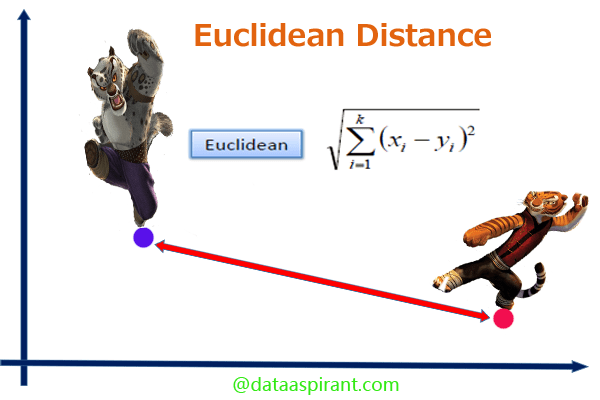

In [33]:
Image(r"C:\Users\saurabhkumar9\NLP Practicum Materials\euclidean.png")

In [43]:
print('Master Sentence: %s' % news_headlines[0])

for i, news_headline in enumerate(news_headlines):
    score = sklearn.metrics.pairwise.euclidean_distances([transformed_results[i]], [transformed_results[0]])[0][0]
    print('-----')
    print('Score: %.2f, Comparing Sentence: %s' % (score, news_headline)) # https://docs.python.org/2/library/stdtypes.html#string-formatting-operations

Master Sentence: Elon Musk's Boring Co to build high-speed airport link in Chicago
-----
Score: 0.00, Comparing Sentence: Elon Musk's Boring Co to build high-speed airport link in Chicago
-----
Score: 1.73, Comparing Sentence: Elon Musk's Boring Company to build high-speed Chicago airport link
-----
Score: 4.36, Comparing Sentence: Elon Musk’s Boring Company approved to build high-speed transit between downtown Chicago and O’Hare Airport
-----
Score: 4.24, Comparing Sentence: Both apple and orange are fruit


##### Cosine Similarity

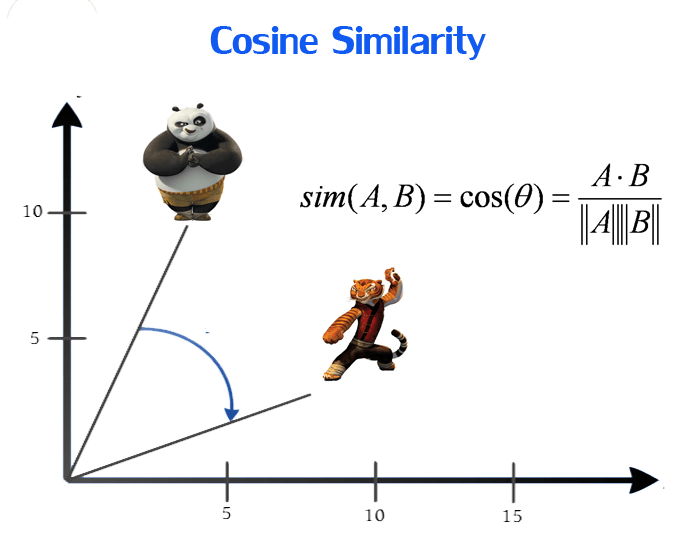

In [54]:
Image(r"C:\Users\saurabhkumar9\NLP Practicum Materials\Images\Cosine Similarity.png")

Determine the angle between two objects is the calculation method to the find similarity. The range of score is 0 to 1. If score is 1, it means that they are same in orientation (not magnitude). The following example shows score when comparing the first sentence.

In [56]:
print('Master Sentence: %s' % news_headlines[0])
for i, news_headline in enumerate(news_headlines):
    score = sklearn.metrics.pairwise.cosine_similarity([transformed_results[i]], [transformed_results[0]])[0][0]
    print('-----')
    print('Score: %.2f, Comparing Sentence: %s' % (score, news_headline))

Master Sentence: Elon Musk's Boring Co to build high-speed airport link in Chicago
-----
Score: 1.00, Comparing Sentence: Elon Musk's Boring Co to build high-speed airport link in Chicago
-----
Score: 0.87, Comparing Sentence: Elon Musk's Boring Company to build high-speed Chicago airport link
-----
Score: 0.44, Comparing Sentence: Elon Musk’s Boring Company approved to build high-speed transit between downtown Chicago and O’Hare Airport
-----
Score: 0.00, Comparing Sentence: Both apple and orange are fruit


In [71]:
from sklearn.metrics.pairwise import linear_kernel

def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [(index, cosine_similarities[index]) for index in related_docs_indices][0:top_n]

In [72]:
find_similar(xtrain_tfidf, 1)

[(483, 0.31416862863050804),
 (430, 0.29781457175347226),
 (235, 0.28545948759152007),
 (583, 0.280328055141376),
 (147, 0.26999812024323355)]

##### Jaccard Similarity

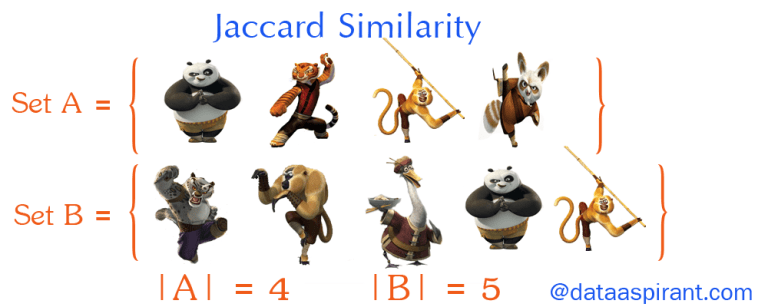

In [57]:
Image(r"C:\Users\saurabhkumar9\NLP Practicum Materials\Images\Jaccard Similarity.png")

The measurement is refer to number of common words over all words. More commons mean both objects should be similarity. Jaccard Similarity = (Intersection of A and B) / (Union of A and B) The range is 0 to 1. If score is 1, it means that they are identical. There is no any common word between the first sentence and the last sentence so the score is 0. The following example shows score when comparing the first sentence.

In [60]:
"""
    Finding the posistion (from lookup table) of word instead of using 1 or 0
    to prevent misleading of the meaning of "common" word
"""

def calculate_position(values):
    x = []
    for pos, matrix in enumerate(values):
        if matrix > 0:
            x.append(pos)
    return x

"""
    Since scikit-learn can only compare same number of dimension of input. 
    Add padding to the shortest sentence.
"""
def padding(sentence1, sentence2):
    x1 = sentence1.copy()
    x2 = sentence2.copy()
    
    diff = len(x1) - len(x2)
    
    if diff > 0:
        for i in range(0, diff):
            x2.append(-1)
            
    elif diff < 0:
        for i in range(0, abs(diff)):
            x1.append(-1)
    
    return x1, x2    

y_actual = calculate_position(transformed_results[0])

print('Master Sentence: %s' % news_headlines[0])
for i, news_headline in enumerate(news_headlines):
    y_compare = calculate_position(transformed_results[i])
    x1, x2 = padding(y_actual, y_compare)
    score = sklearn.metrics.jaccard_similarity_score(x1, x2)
    print('-----')
    print('Score: %.2f, Comparing Sentence: %s' % (score, news_headline))

Master Sentence: Elon Musk's Boring Co to build high-speed airport link in Chicago
-----
Score: 1.00, Comparing Sentence: Elon Musk's Boring Co to build high-speed airport link in Chicago
-----
Score: 0.67, Comparing Sentence: Elon Musk's Boring Company to build high-speed Chicago airport link
-----
Score: 0.17, Comparing Sentence: Elon Musk’s Boring Company approved to build high-speed transit between downtown Chicago and O’Hare Airport
-----
Score: 0.00, Comparing Sentence: Both apple and orange are fruit


C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score h

##### Conclusion

Three methods also have same assumption which is the document (or sentence) are similar if having common words. This idea is very straight forward and simple. It fits some basic cases such as comparing first 2 sentence. However, the score is relative low by comparing first sentence and third sentence although both of them describe same news. 

Another limitation is that above methods does not handle synonym scenario. For example buy and purchase, it should have same meaning (in some cases) but above methods will treat both words are difference. 

So what is the cue? You may consider to use Word Embedding which introduced by Tomas Mikolov in 2013.